In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
data = pd.read_csv(url)

In [41]:
US = data[data['Country/Region'] == 'US']
US_cities = US[US['Province/State'].str.contains(',')]
US_cities['Area'], US_cities['State'] = US_cities['Province/State'].str.split(', ', 1).str
US_cities['Total'] = US_cities[list(US_cities)[4:-2]].sum(axis=1)

<ipython-input-41-01d1a7770896>:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  US_cities['Area'], US_cities['State'] = US_cities['Province/State'].str.split(', ', 1).str
<ipython-input-41-01d1a7770896>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_cities['Area'], US_cities['State'] = US_cities['Province/State'].str.split(', ', 1).str
<ipython-input-41-01d1a7770896>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_cities['Total'] = US_cities[list(US_cit

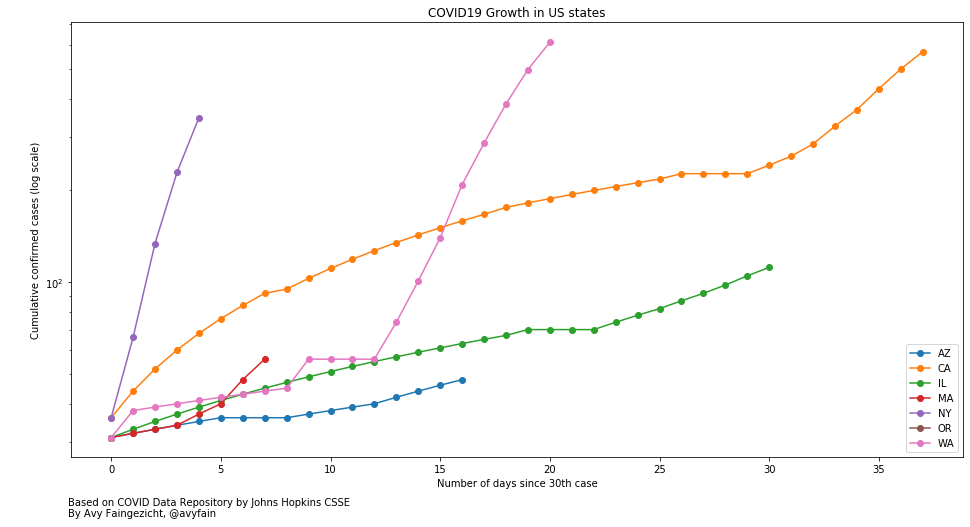

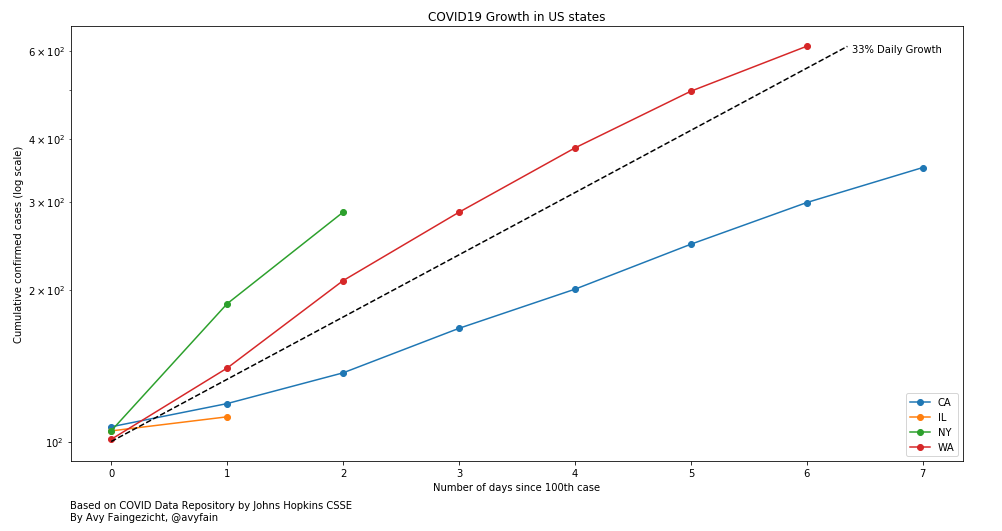

In [50]:
for case_threshold in [30, 100]:
    df = US_cities[US_cities['Total'] > case_threshold].sort_values(by='Total')
    df = df.drop(['Province/State', 'Country/Region', 'Lat', 'Long', 'Total'], axis=1)
    cols = list(df)
    df = df[cols[-2:] + cols[:-2]]
    states = df.melt(id_vars=['Area','State'], var_name='date', value_name='cases_confirmed')
    pivoted = states.groupby(['State', 'date'], as_index=False).sum().pivot('date', 'State').cumsum()
    cleaned = pivoted.reset_index().cases_confirmed
    cols = []

    for col in cleaned:
        cols.append(cleaned[col][cleaned[col] > case_threshold].dropna().reset_index()[col])

    fig = plt.figure(figsize=(16, 8))
    ax = plt.axes()
    pd.concat(cols, axis=1, names=list(cleaned)).plot(ax=ax, marker='o', logy=True)
    plt.title('COVID19 Growth in US states')
    plt.ylabel('Cumulative confirmed cases (log scale)')
    plt.xlabel(f'Number of days since {case_threshold}th case')
    plt.annotate('Based on COVID Data Repository by Johns Hopkins CSSE\nBy Avy Faingezicht, @avyfain', 
                 (0.07, 0.02), xycoords='figure fraction', fontsize=10);
    plt.legend(loc="lower right")
    if case_threshold == 100:
        x = np.linspace(0, plt.xlim()[1] - 1)
        plt.plot(x, 100 * (1.33) ** x, ls='--', color='k', label='33% daily growth')
        plt.annotate('33% Daily Growth', 
                     (0.85, 0.9), xycoords='figure fraction', fontsize=10);
